In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import utils
import time
import os

from unicodedata import category
from tqdm import tqdm
#from tqdm import tqdm_notebook as tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

import WOSutilities as wosutil

path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
data = pd.read_pickle("/mnt/disks/vault/citation-data-all/article-cat-c5-merged.pql")

In [11]:
data.columns

Index(['ArticleID', 'PubYear_x', 'Doctypes', 'Title', 'Type', 'Label',
       'PubYear_y', 'c5'],
      dtype='object')

In [17]:
# 22% of articles have pubyear_x different from pubyear_y -why?
data[data['PubYear_x'] == data['PubYear_y']].count()

ArticleID    30520771
PubYear_x    30520771
Doctypes     30520771
Title        30520764
Type           738469
Label          738469
PubYear_y    30520771
c5           30520771
dtype: int64

In [20]:
#number of characters in each title


def get_length(s):
    len_s = 0
    try:
        len_s = len(s)
    except:
        pass
    return len_s

data['character_counts'] = data['Title'].progress_apply(lambda x: get_length(x))

Progress: 100%|██████████| 39171597/39171597 [00:50<00:00, 782011.91it/s]


In [21]:
data.head()

,ArticleID,PubYear_x,Doctypes,Title,Type,Label,PubYear_y,c5,character_counts
0,A1981LC59600003,1981,Article,SPORADIC LEGIONELLOSIS IN THE UNITED-STATES - ...,NaN,NaN,1981.0,48.0,68
1,A1981LC51800016,1981,Article,REACTION OF LEAD PERCHLORATE WITH AMMONIUM HYD...,NaN,NaN,1981.0,0.0,78
2,A1981MP52000011,1981,Article,ELECTRICAL PACING FOR SHORT BOWEL SYNDROME,NaN,NaN,1981.0,5.0,42
3,A1981LZ55900001,1981,Review,STABILITY TESTING OF SOLID DRUGS USING PREFERE...,NaN,NaN,1981.0,3.0,157
4,A1981ME20500010,1981,Article,ON THE DETERMINATION OF THE 1ST NORMAL STRESS ...,NaN,NaN,1981.0,1.0,96


In [22]:
# correction - adding 1 to all the citation counts (for easiness of log scale calculations)
# and taking the log scale on it
import numpy as np

data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))

Progress: 100%|██████████| 39171597/39171597 [01:21<00:00, 480731.75it/s]


In [23]:
# variation of character length with citations count
grouped_df_charactercount = data.groupby('character_counts', as_index=False)['log_c5'].mean()
grouped_df_charactercount.head()

,character_counts,log_c5
0,0,1.436773
1,1,0.738641
2,2,0.276585
3,3,0.196824
4,4,0.211048


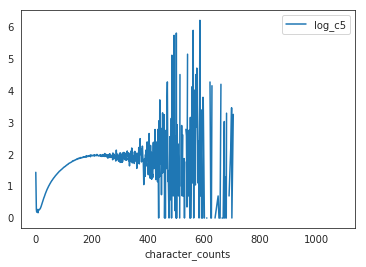

In [25]:
grouped_df_charactercount.plot(x='character_counts', y='log_c5', style='-')

In [26]:
## word count vs log_c5

# clean up puctuations from titles
sample = data.head(100)

# there are some titles with some problems - to be identified
def remove_punct(s):
    op = ''
    try:
        op = ''.join(ch for ch in str(s) if category(ch)[0] != 'P')
    except:
        op = ''
    return op
    
    
def count_words(s):
    words = 0
    try:
        words = len(s.split())
    except:
        pass
    return words    
    

data['title_without_punctuations'] = data['Title'].progress_apply(lambda x: remove_punct(x))
data["words_in_title"] = data["Title"].progress_apply(lambda x: count_words(x))

Progress: 100%|██████████| 39171597/39171597 [01:17<00:00, 503580.63it/s]


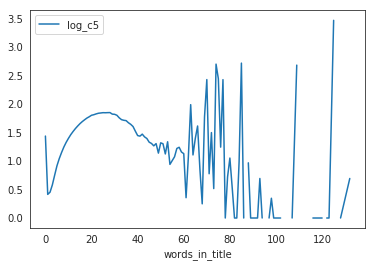

In [28]:
grouped_df_wordcount = data.groupby('words_in_title', as_index=False)['log_c5'].mean()
grouped_df_wordcount.plot(x='words_in_title', y='log_c5', style='-')

In [ ]:
# Has the change in wordcount changed c5 counts over the years?